In [ ]:

# example of loading the cifar10 dataset
from keras.datasets.cifar10 import load_data
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()
# summarize the shape of the dataset
print('Train', trainX.shape, trainy.shape)
print('Test', testX.shape, testy.shape)

170498071/170498071 [==============================] - 2s 0us/step
Train (50000, 32, 32, 3) (50000, 1)
Test (10000, 32, 32, 3) (10000, 1)


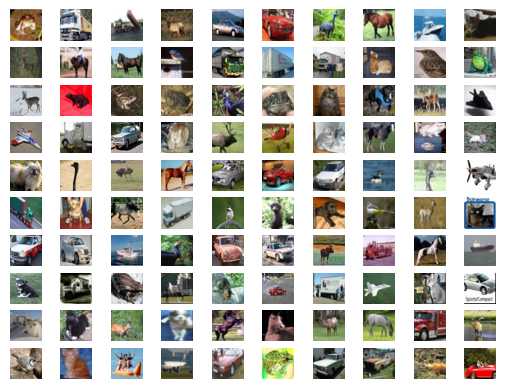

In [ ]:
from matplotlib import pyplot
# plot images from the training dataset
for i in range(100):
 # define subplot
 pyplot.subplot(10, 10, 1 + i)
 # turn off axis
 pyplot.axis('off')
 # plot raw pixel data
 pyplot.imshow(trainX[i])
pyplot.show()

In [ ]:


# example of defining the discriminator model
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model
import numpy as np


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         2

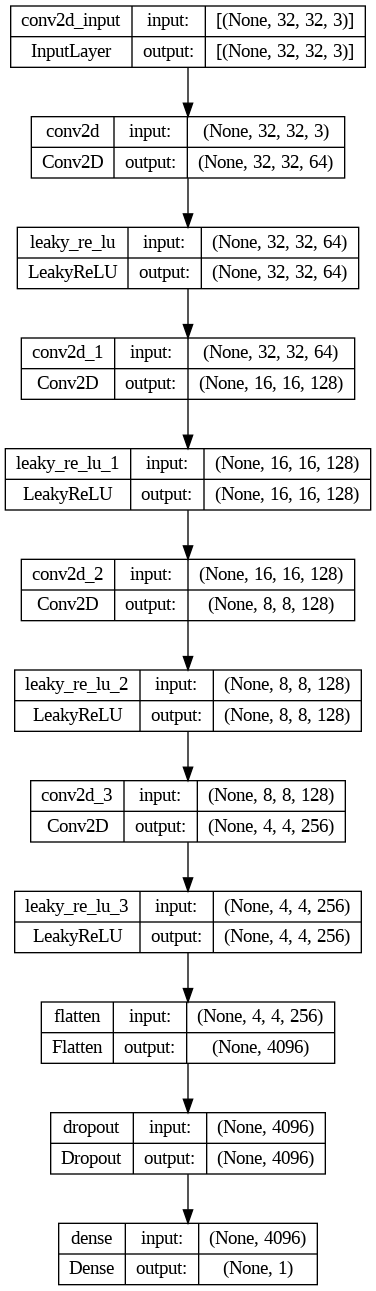

In [ ]:
# define the standalone discriminator model
def define_discriminator(in_shape=(32,32,3)):
 model = Sequential()
 # normal
 model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
 model.add(LeakyReLU(alpha=0.2))
 # downsample
 model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
 model.add(LeakyReLU(alpha=0.2))
 # downsample
 model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
 model.add(LeakyReLU(alpha=0.2))
 # downsample
 model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
 model.add(LeakyReLU(alpha=0.2))
 # classifier
 model.add(Flatten())
 model.add(Dropout(0.4))
 model.add(Dense(1, activation='sigmoid'))
 # compile model
 opt = Adam(lr=0.0002, beta_1=0.5)
 model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
 return model

# define model
model = define_discriminator()
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:

# load and prepare cifar10 training images
def load_real_samples():
 # load cifar10 dataset
 (trainX, _), (_, _) = load_data()
 # convert from unsigned ints to floats
 X = trainX.astype('float32')
 # scale from [0,255] to [-1,1]
 X = (X - 127.5) / 127.5
 return X

In [ ]:
X = load_real_samples()
print(X.shape)
X[0]

(50000, 32, 32, 3)


array([[[-0.5372549 , -0.5137255 , -0.5058824 ],
        [-0.6627451 , -0.6392157 , -0.64705884],
        [-0.60784316, -0.62352943, -0.6627451 ],
        ...,
        [ 0.23921569,  0.03529412, -0.15294118],
        [ 0.19215687, -0.01960784, -0.2       ],
        [ 0.16078432, -0.02745098, -0.19215687]],

       [[-0.8745098 , -0.84313726, -0.84313726],
        [-1.        , -1.        , -1.        ],
        [-0.85882354, -0.9372549 , -1.        ],
        ...,
        [-0.03529412, -0.30980393, -0.5686275 ],
        [-0.06666667, -0.34901962, -0.60784316],
        [-0.04313726, -0.31764707, -0.5529412 ]],

       [[-0.8039216 , -0.8117647 , -0.8352941 ],
        [-0.8745098 , -0.94509804, -1.        ],
        [-0.6156863 , -0.7882353 , -0.9372549 ],
        ...,
        [-0.07450981, -0.34117648, -0.60784316],
        [-0.05882353, -0.34117648, -0.60784316],
        [-0.14509805, -0.42745098, -0.67058825]],

       ...,

       [[ 0.6313726 ,  0.33333334, -0.24705882],
        [ 0

In [ ]:
X = np.random.rand(100, 64, 64, 3)
# select real samples
def generate_real_samples(dataset, n_samples):
 # choose random instances
 ix = np.random.randint(0, dataset.shape[0], n_samples)
 # retrieve selected images
 X = dataset[ix]
 # generate 'real' class labels (1)
 y = np.ones((n_samples, 1))
 return X, y

In [ ]:
X,y = generate_real_samples(X,64)
print(X.shape)
print(y.shape)
print(y)

(64, 64, 64, 3)
(64, 1)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [ ]:
# generate n fake samples with class labels
def generate_fake_samples(n_samples):
 # generate uniform random numbers in [0,1]
 X = np.random.rand(32 * 32 * 3 * n_samples)
 # update to have the range [-1, 1]
 X = -1 + X * 2
 # reshape into a batch of color images
 X = X.reshape((n_samples, 32, 32, 3))
 # generate 'fake' class labels (0)
 y = np.zeros((n_samples, 1))
 return X, y

(64, 32, 32, 3)
(64, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


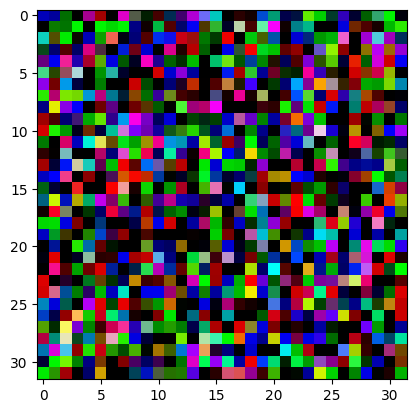

In [ ]:
X,y = generate_fake_samples(64)
print(X.shape)
print(y.shape)
print(y)
pyplot.imshow(X[0])

In [ ]:
# train the discriminator model
def train_discriminator(model, dataset, n_iter=20, n_batch=128):
  half_batch = int(n_batch / 2)
  # manually enumerate epochs
  for i in range(n_iter):
    # get randomly selected 'real' samples
    X_real, y_real = generate_real_samples(dataset, half_batch)
    # update discriminator on real samples
    _, real_acc = model.train_on_batch(X_real, y_real)
    # generate 'fake' examples
    X_fake, y_fake = generate_fake_samples(half_batch)
    # update discriminator on fake samples
    _, fake_acc = model.train_on_batch(X_fake, y_fake)
    # summarize performance
    print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [ ]:
# define the discriminator model
model = define_discriminator()
# load image data
dataset = load_real_samples()
# fit the model
train_discriminator(model, dataset)

>1 real=52% fake=0%
>2 real=100% fake=0%
>3 real=94% fake=73%
>4 real=94% fake=100%
>5 real=98% fake=100%
>6 real=92% fake=100%
>7 real=100% fake=100%
>8 real=98% fake=100%
>9 real=100% fake=100%
>10 real=100% fake=100%
>11 real=100% fake=100%
>12 real=98% fake=100%
>13 real=100% fake=100%
>14 real=100% fake=100%
>15 real=100% fake=100%
>16 real=100% fake=100%
>17 real=100% fake=100%
>18 real=100% fake=100%
>19 real=100% fake=100%
>20 real=100% fake=100%


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 4096)              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 8, 8, 128)         524416    
 anspose)                                                        
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 16, 16, 128)       262272    
 Transpose)                                           

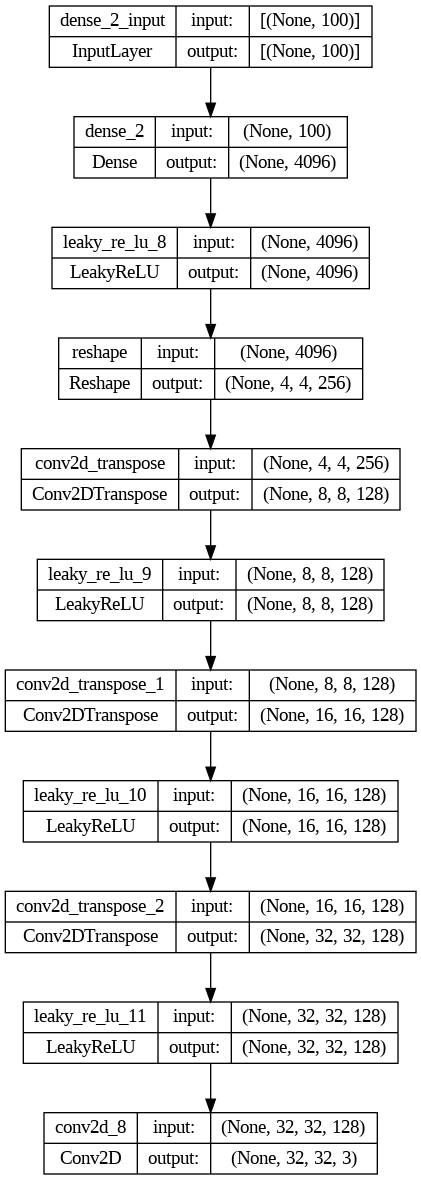

In [ ]:
# example of defining the generator model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model

# define the standalone generator model
def define_generator(latent_dim):
 model = Sequential()
 # foundation for 4x4 image
 n_nodes = 256 * 4 * 4
 model.add(Dense(n_nodes, input_dim=latent_dim))
 model.add(LeakyReLU(alpha=0.2))
 model.add(Reshape((4, 4, 256)))
 # upsample to 8x8
 model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
 model.add(LeakyReLU(alpha=0.2))
 # upsample to 16x16
 model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
 model.add(LeakyReLU(alpha=0.2))
 # upsample to 32x32
 model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
 model.add(LeakyReLU(alpha=0.2))
 # output layer
 model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
 return model

# define the size of the latent space
latent_dim = 100
# define the generator model
model = define_generator(latent_dim)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
 # generate points in the latent space
 x_input = np.random.randn(latent_dim * n_samples)
 # reshape into a batch of inputs for the network
 x_input = x_input.reshape(n_samples, latent_dim)
 return x_input

In [ ]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
 # generate points in latent space
 x_input = generate_latent_points(latent_dim, n_samples)
 # predict outputs
 X = g_model.predict(x_input)
 # create 'fake' class labels (0)
 y = np.zeros((n_samples, 1))
 return X, y

2/2 [==============================] - 1s 192ms/step


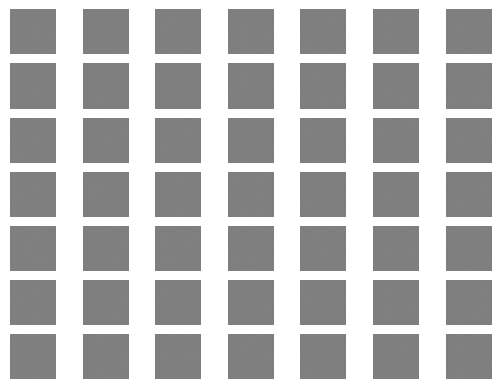

In [ ]:
# size of the latent space
latent_dim = 100
# define the discriminator model
model = define_generator(latent_dim)
# generate samples
n_samples = 49
X, _ = generate_fake_samples(model, latent_dim, n_samples)
# scale pixel values from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the generated samples
for i in range(n_samples):
 # define subplot
 pyplot.subplot(7, 7, 1 + i)
 # turn off axis labels
 pyplot.axis('off')
 # plot single image
 pyplot.imshow(X[i])
# show the figure
pyplot.show()

In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
 # make weights in the discriminator not trainable
 d_model.trainable = False
 # connect them
 model = Sequential()
 # add generator
 model.add(g_model)
 # add the discriminator
 model.add(d_model)
 # compile model
 opt = Adam(lr=0.0002, beta_1=0.5)
 model.compile(loss='binary_crossentropy', optimizer=opt)
 return model

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 32, 32, 3)         1466115   
                                                                 
 sequential_4 (Sequential)   (None, 1)                 522497    
                                                                 
Total params: 1988612 (7.59 MB)
Trainable params: 1466115 (5.59 MB)
Non-trainable params: 522497 (1.99 MB)
_________________________________________________________________


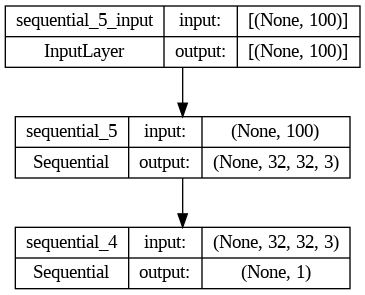

In [ ]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
  bat_per_epo = int(dataset.shape[0] / n_batch)
  half_batch = int(n_batch / 2)
  # manually enumerate epochs
  for i in range(n_epochs):
    # enumerate batches over the training set
    for j in range(bat_per_epo):
      # get randomly selected 'real' samples
      X_real, y_real = generate_real_samples(dataset, half_batch)
      # update discriminator model weights
      d_loss1, _ = d_model.train_on_batch(X_real, y_real)
      # generate 'fake' examples
      X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
      # update discriminator model weights
      d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
      # prepare points in latent space as input for the generator
      X_gan = generate_latent_points(latent_dim, n_batch)
      # create inverted labels for the fake samples
      y_gan = np.ones((n_batch, 1))
      # update the generator via the discriminator's error
      g_loss = gan_model.train_on_batch(X_gan, y_gan)
      # summarize loss on this batch
      print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
        (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
      # evaluate the model performance, sometimes
    if (i+1) % 10 == 0:
      summarize_performance(i, g_model, d_model, dataset, latent_dim)

In [ ]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
 # prepare real samples
 X_real, y_real = generate_real_samples(dataset, n_samples)
 # evaluate discriminator on real examples
 _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
 # prepare fake examples
 x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
 # evaluate discriminator on fake examples
 _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
 # summarize discriminator performance
 print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
 # save plot
 save_plot(x_fake, epoch)
 # save the generator model tile file
 filename = 'generator_model_%03d.h5' % (epoch+1)
 g_model.save(filename)

In [ ]:
# create and save a plot of generated images
def save_plot(examples, epoch, n=7):
 # scale from [-1,1] to [0,1]
 examples = (examples + 1) / 2.0
 # plot images
 for i in range(n * n):
    # define subplot
    pyplot.subplot(n, n, 1 + i)
    # turn off axis
    pyplot.axis('off')
    # plot raw pixel data
    pyplot.imshow(examples[i])
 # save plot to file
 filename = 'generated_plot_e%03d.png' % (epoch+1)
 pyplot.savefig(filename)
 pyplot.close()

In [ ]:
train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128)

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 5ms/step
>4, 232/390, d1=0.790, d2=0.590 g=1.178
2/2 [==============================] - 0s 5ms/step
>4, 233/390, d1=0.791, d2=0.545 g=1.161
2/2 [==============================] - 0s 5ms/step
>4, 234/390, d1=0.734, d2=0.532 g=1.240
2/2 [==============================] - 0s 5ms/step
>4, 235/390, d1=0.786, d2=0.551 g=1.169
2/2 [==============================] - 0s 5ms/step
>4, 236/390, d1=0.649, d2=0.525 g=1.211
2/2 [==============================] - 0s 5ms/step
>4, 237/390, d1=0.606, d2=0.536 g=1.149
2/2 [==============================] - 0s 4ms/step
>4, 238/390, d1=0.571, d2=0.630 g=1.171
2/2 [==============================] - 0s 3ms/step
>4, 239/390, d1=0.543, d2=0.549 g=1.162
2/2 [==============================] - 0s 5ms/step
>4, 240/390, d1=0.550, d2=0.616 g=1.115
2/2 [==============================] - 0s 5ms/step
>4, 241/390, d1=0.578, d2=0.661 g=1.154
2/2 [==============================] - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 5ms/step
>14, 232/390, d1=0.000, d2=0.000 g=13.079
2/2 [==============================] - 0s 5ms/step
>14, 233/390, d1=0.000, d2=0.000 g=12.959
2/2 [==============================] - 0s 4ms/step
>14, 234/390, d1=0.000, d2=0.000 g=12.728
2/2 [==============================] - 0s 5ms/step
>14, 235/390, d1=0.000, d2=0.000 g=12.935
2/2 [==============================] - 0s 6ms/step
>14, 236/390, d1=0.000, d2=0.000 g=13.427
2/2 [==============================] - 0s 4ms/step
>14, 237/390, d1=0.000, d2=0.000 g=13.436
2/2 [==============================] - 0s 5ms/step
>14, 238/390, d1=0.000, d2=0.000 g=13.443
2/2 [==============================] - 0s 5ms/step
>14, 239/390, d1=0.000, d2=0.000 g=12.499
2/2 [==============================] - 0s 5ms/step
>14, 240/390, d1=0.000, d2=0.000 g=13.014
2/2 [==============================] - 0s 4ms/step
>14, 241/390, d1=0.000, d2=0.000 g=12.885
2/2 [==============

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 5ms/step
>24, 232/390, d1=0.000, d2=0.000 g=51.815
2/2 [==============================] - 0s 5ms/step
>24, 233/390, d1=0.000, d2=0.000 g=52.202
2/2 [==============================] - 0s 5ms/step
>24, 234/390, d1=0.000, d2=0.000 g=53.258
2/2 [==============================] - 0s 5ms/step
>24, 235/390, d1=0.000, d2=0.000 g=52.285
2/2 [==============================] - 0s 5ms/step
>24, 236/390, d1=0.000, d2=0.000 g=53.769
2/2 [==============================] - 0s 5ms/step
>24, 237/390, d1=0.000, d2=0.000 g=53.974
2/2 [==============================] - 0s 5ms/step
>24, 238/390, d1=0.000, d2=0.240 g=69.432
2/2 [==============================] - 0s 5ms/step
>24, 239/390, d1=0.000, d2=0.000 g=79.884
2/2 [==============================] - 0s 4ms/step
>24, 240/390, d1=0.257, d2=0.000 g=82.826
2/2 [==============================] - 0s 5ms/step
>24, 241/390, d1=0.000, d2=0.000 g=81.911
2/2 [==============

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 6ms/step
>34, 232/390, d1=0.000, d2=0.000 g=78.805
2/2 [==============================] - 0s 6ms/step
>34, 233/390, d1=0.000, d2=0.000 g=78.195
2/2 [==============================] - 0s 5ms/step
>34, 234/390, d1=0.098, d2=0.000 g=62.904
2/2 [==============================] - 0s 6ms/step
>34, 235/390, d1=0.000, d2=0.569 g=94.089
2/2 [==============================] - 0s 5ms/step
>34, 236/390, d1=0.000, d2=0.000 g=116.648
2/2 [==============================] - 0s 5ms/step
>34, 237/390, d1=0.000, d2=0.000 g=121.013
2/2 [==============================] - 0s 6ms/step
>34, 238/390, d1=0.000, d2=0.000 g=123.203
2/2 [==============================] - 0s 5ms/step
>34, 239/390, d1=0.000, d2=0.000 g=123.569
2/2 [==============================] - 0s 8ms/step
>34, 240/390, d1=0.007, d2=0.000 g=118.866
2/2 [==============================] - 0s 5ms/step
>34, 241/390, d1=0.000, d2=0.000 g=114.874
2/2 [========

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 6ms/step
>44, 232/390, d1=3.874, d2=0.481 g=993.548
2/2 [==============================] - 0s 4ms/step
>44, 233/390, d1=37.057, d2=2.151 g=637.069
2/2 [==============================] - 0s 5ms/step
>44, 234/390, d1=12.681, d2=26.173 g=559.865
2/2 [==============================] - 0s 6ms/step
>44, 235/390, d1=13.983, d2=14.537 g=728.035
2/2 [==============================] - 0s 4ms/step
>44, 236/390, d1=21.881, d2=5.747 g=639.935
2/2 [==============================] - 0s 5ms/step
>44, 237/390, d1=26.981, d2=20.415 g=815.729
2/2 [==============================] - 0s 5ms/step
>44, 238/390, d1=7.484, d2=0.000 g=900.941
2/2 [==============================] - 0s 4ms/step
>44, 239/390, d1=33.651, d2=17.549 g=681.720
2/2 [==============================] - 0s 5ms/step
>44, 240/390, d1=2.389, d2=0.146 g=728.077
2/2 [==============================] - 0s 5ms/step
>44, 241/390, d1=24.973, d2=3.439 g=635.51

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 4ms/step
>54, 232/390, d1=0.000, d2=0.000 g=2107.234
2/2 [==============================] - 0s 5ms/step
>54, 233/390, d1=0.000, d2=0.000 g=2110.706
2/2 [==============================] - 0s 6ms/step
>54, 234/390, d1=0.000, d2=0.000 g=2130.176
2/2 [==============================] - 0s 5ms/step
>54, 235/390, d1=0.000, d2=0.000 g=2123.752
2/2 [==============================] - 0s 5ms/step
>54, 236/390, d1=0.000, d2=0.000 g=2041.438
2/2 [==============================] - 0s 6ms/step
>54, 237/390, d1=0.000, d2=0.000 g=2064.729
2/2 [==============================] - 0s 5ms/step
>54, 238/390, d1=0.000, d2=0.000 g=2074.995
2/2 [==============================] - 0s 5ms/step
>54, 239/390, d1=0.000, d2=0.000 g=2057.896
2/2 [==============================] - 0s 5ms/step
>54, 240/390, d1=0.000, d2=0.000 g=2119.226
2/2 [==============================] - 0s 5ms/step
>54, 241/390, d1=0.000, d2=0.000 g=2125.052

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 10ms/step
>64, 232/390, d1=0.000, d2=0.000 g=1825.968
2/2 [==============================] - 0s 6ms/step
>64, 233/390, d1=0.000, d2=0.000 g=1885.449
2/2 [==============================] - 0s 4ms/step
>64, 234/390, d1=0.000, d2=0.000 g=1845.772
2/2 [==============================] - 0s 5ms/step
>64, 235/390, d1=0.000, d2=0.000 g=1851.981
2/2 [==============================] - 0s 6ms/step
>64, 236/390, d1=0.000, d2=0.000 g=1734.624
2/2 [==============================] - 0s 5ms/step
>64, 237/390, d1=0.000, d2=0.000 g=1862.914
2/2 [==============================] - 0s 6ms/step
>64, 238/390, d1=0.000, d2=0.000 g=1834.077
2/2 [==============================] - 0s 6ms/step
>64, 239/390, d1=0.000, d2=0.000 g=1832.040
2/2 [==============================] - 0s 5ms/step
>64, 240/390, d1=0.000, d2=0.000 g=1894.188
2/2 [==============================] - 0s 5ms/step
>64, 241/390, d1=0.000, d2=0.000 g=1779.65

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 7ms/step
>74, 232/390, d1=0.000, d2=0.000 g=1141.972
2/2 [==============================] - 0s 5ms/step
>74, 233/390, d1=0.000, d2=0.000 g=1143.742
2/2 [==============================] - 0s 8ms/step
>74, 234/390, d1=0.000, d2=0.000 g=1143.734
2/2 [==============================] - 0s 5ms/step
>74, 235/390, d1=0.000, d2=0.000 g=1087.347
2/2 [==============================] - 0s 5ms/step
>74, 236/390, d1=0.000, d2=0.000 g=1134.734
2/2 [==============================] - 0s 5ms/step
>74, 237/390, d1=3.750, d2=0.000 g=996.631
2/2 [==============================] - 0s 5ms/step
>74, 238/390, d1=0.000, d2=0.000 g=1006.304
2/2 [==============================] - 0s 5ms/step
>74, 239/390, d1=0.000, d2=0.000 g=990.862
2/2 [==============================] - 0s 4ms/step
>74, 240/390, d1=0.000, d2=0.000 g=977.666
2/2 [==============================] - 0s 6ms/step
>74, 241/390, d1=0.000, d2=0.000 g=968.734
2/2

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 4ms/step
>84, 232/390, d1=0.000, d2=0.000 g=739.813
2/2 [==============================] - 0s 6ms/step
>84, 233/390, d1=0.000, d2=0.000 g=739.794
2/2 [==============================] - 0s 4ms/step
>84, 234/390, d1=0.000, d2=0.000 g=729.400
2/2 [==============================] - 0s 4ms/step
>84, 235/390, d1=1.043, d2=0.000 g=581.289
2/2 [==============================] - 0s 5ms/step
>84, 236/390, d1=0.000, d2=0.000 g=534.956
2/2 [==============================] - 0s 5ms/step
>84, 237/390, d1=0.000, d2=0.000 g=520.932
2/2 [==============================] - 0s 7ms/step
>84, 238/390, d1=0.000, d2=0.000 g=513.182
2/2 [==============================] - 0s 4ms/step
>84, 239/390, d1=0.000, d2=0.000 g=538.634
2/2 [==============================] - 0s 4ms/step
>84, 240/390, d1=0.000, d2=0.000 g=510.127
2/2 [==============================] - 0s 4ms/step
>84, 241/390, d1=0.000, d2=0.000 g=516.437
2/2 [====

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 4ms/step
>94, 232/390, d1=0.000, d2=0.000 g=461.053
2/2 [==============================] - 0s 5ms/step
>94, 233/390, d1=0.000, d2=0.000 g=483.807
2/2 [==============================] - 0s 5ms/step
>94, 234/390, d1=0.000, d2=0.000 g=473.490
2/2 [==============================] - 0s 8ms/step
>94, 235/390, d1=0.000, d2=0.000 g=481.370
2/2 [==============================] - 0s 4ms/step
>94, 236/390, d1=0.000, d2=0.000 g=462.770
2/2 [==============================] - 0s 5ms/step
>94, 237/390, d1=0.000, d2=0.000 g=476.851
2/2 [==============================] - 0s 4ms/step
>94, 238/390, d1=0.000, d2=0.000 g=460.604
2/2 [==============================] - 0s 5ms/step
>94, 239/390, d1=0.000, d2=0.000 g=486.932
2/2 [==============================] - 0s 7ms/step
>94, 240/390, d1=0.000, d2=0.000 g=468.557
2/2 [==============================] - 0s 4ms/step
>94, 241/390, d1=0.000, d2=0.000 g=482.886
2/2 [====

4/4 [==============================] - 0s 6ms/step


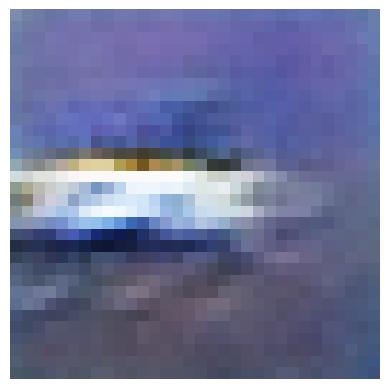

100

In [ ]:
# example of loading the generator model and generating images
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot

#generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
  #generate points in the latent space
  x_input = randn(latent_dim * n_samples)
  #reshape into a batch of inputs for the network
  x_input = x_input.reshape(n_samples, latent_dim)
  return x_input

#plot the generated images
def create_plot(examples, n):
  #plot images
  for i in range(n * n):
    #define subplot
    pyplot.subplot(n, n, 1+i)
    #turn off axis
    pyplot.axis('off')
    #plot row pixel data
    pyplot.imshow(examples[i, :, :])
  pyplot.show()

#Load model
model = load_model('generator_model_010.h5')
#generate images
latent_points = generate_latent_points(100, 100)
#generate images
X = model.predict(latent_points)
#scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
#plot the result
create_plot(X, 1)


X.shape[0]